Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
pwd

'/Users/kohn1001/technical/kaggle/competitive-data-science/Programming assignment, week 1: Pandas basics'

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
# YOUR CODE GOES HERE
merged_items_n_transaction = transactions.merge(items, how='inner', on='item_id')
merged_items_n_transaction.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [7]:
# merged_items_n_transaction['date'] = 
merged_items_n_transaction['date'] = pd.to_datetime(merged_items_n_transaction['date'], format='%d.%m.%Y')
# new_df.head()
merged_items_n_transaction.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [9]:
merged_items_n_transaction['revenue'] = merged_items_n_transaction.item_price * merged_items_n_transaction.item_cnt_day
merged_items_n_transaction_bw_dates = merged_items_n_transaction[(merged_items_n_transaction.date.dt.year == 2014) & \
                                                                 (merged_items_n_transaction.date.dt.month == 9)]


In [10]:
max_revenue = merged_items_n_transaction_bw_dates.groupby('shop_id').revenue.sum().max()
max_revenue.max()

7982852.199999961

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [11]:
# YOUR CODE GOES HERE

max_revenue = max_revenue = merged_items_n_transaction_bw_dates.groupby('shop_id').revenue.sum().max() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)


Current answer for task max_revenue is: 7982852.199999961


In [12]:
summer_items_n_trans = merged_items_n_transaction[(merged_items_n_transaction.date.dt.year==2014) & \
                                                  (merged_items_n_transaction.date.dt.month >= 6) & \
                                                  (merged_items_n_transaction.date.dt.month <= 8)]

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [13]:
max_index = summer_items_n_trans.groupby('item_category_id').revenue.sum().argmax()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [14]:
max_index

20

In [15]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = max_index# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [16]:
(merged_items_n_transaction.groupby('item_id').nunique()['item_price']== 1).sum()

5926

In [61]:
# YOUR CODE GOES HERE

num_items_constant_price = (merged_items_n_transaction.groupby('item_id').nunique()['item_price']== 1).sum()# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)


Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [17]:
dec_items = merged_items_n_transaction[(merged_items_n_transaction['shop_id'] == 25) & \
                           (merged_items_n_transaction.date.dt.year == 2014) & \
                           (merged_items_n_transaction.date.dt.month == 12)]

In [18]:
dec_items.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,revenue
2346,2014-12-21,23,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,399.0
2347,2014-12-20,23,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,798.0
2348,2014-12-10,23,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,399.0
2349,2014-12-01,23,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,399.0
2350,2014-12-23,23,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,399.0


In [23]:
dec_items.item_cnt_day
days = dec_items.date.dt.day
days

2346       21
2347       20
2348       10
2349        1
2350       23
3484        9
3485        8
3486       17
3487       20
3488       27
3489       25
5866       27
5867       20
5868        5
13463      31
20293      30
20294      28
20295      27
20296      25
20297      20
20298      19
20299      18
20300      17
20301       6
20302       1
20303       7
22956      20
23227      21
23710      31
23711      14
           ..
2765715    27
2765720    30
2765721    27
2765723    27
2765726     9
2765730    28
2765736    31
2765737    27
2765738    23
2765745    31
2765746    30
2765754    31
2765760    31
2765761    30
2765762    27
2765770    30
2765777    31
2765778    20
2765780    27
2765782    25
2765785    30
2765787    24
2765789    31
2765792    31
2765794    23
2765797    23
2765801    19
2765812     3
2765814     3
2765816     3
Name: date, Length: 8684, dtype: int64

In [57]:
shop_id = 25
dec_items['day'] = dec_items.date.dt.day
total_num_items_sold = dec_items.groupby(['date'])['item_cnt_day'].agg('sum')
days = dec_items.groupby('date').agg('sum')
days.head()
# total_num_items_sold.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,revenue,day
date,,,,,,,,
2014-12-01,2829,3075,1242306,184735.166667,153.0,5100,209894.0,123
2014-12-02,2645,2875,1102409,133824.000000,169.0,4867,213936.0,230
2014-12-03,3473,3775,1633215,174046.783333,195.0,6142,232803.0,453
2014-12-04,2944,3200,1341594,202249.666667,164.0,5104,279488.0,512
2014-12-05,5221,5675,2451915,301296.066667,300.0,9760,410842.0,1135


In [58]:
type(total_num_items_sold)

pandas.core.series.Series

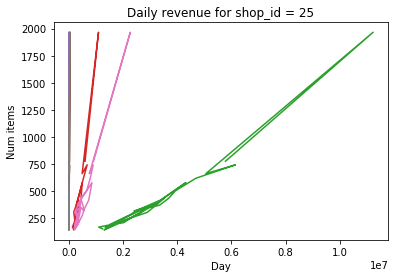

In [55]:
shop_id = 25
# dec_items['day'] = dec_items.date.dt.day
# total_num_items_sold = dec_items.groupby('item_cnt_day.values# YOUR CODE GOES HERE
# days = dec_items.date.dt.day.values

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()



In [59]:
total_num_items_sold_var = total_num_items_sold.var(axis=0,ddof=1)
# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117167.70229885059


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [62]:
STUDENT_EMAIL = 'nattykohn@gmail.com'# EMAIL HERE
STUDENT_TOKEN = 'uusKR6wmxPBVVyJR'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999961
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [63]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)